## Applying functions on raster data

### Normalising band values

In [1]:
import geopandas as gpd


import matplotlib.pyplot as plt
from matplotlib import colors

import rasterio
from rasterio.mask import mask

import numpy as np

from rasterio.plot import show

In [2]:
raster_path = 'combined_raster.tif'

In [3]:
with rasterio.open(raster_path) as src:
    band1 = src.read(1).astype(float)
    band2 = src.read(1).astype(float)

    band1_norm = (band1 - band1.min()) / (band1.max() - band1.min())
    band2_norm = (band2 - band2.min()) / (band2.max() - band2.min())

In [4]:
band1_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1185, 931))

[None, None, None, None]

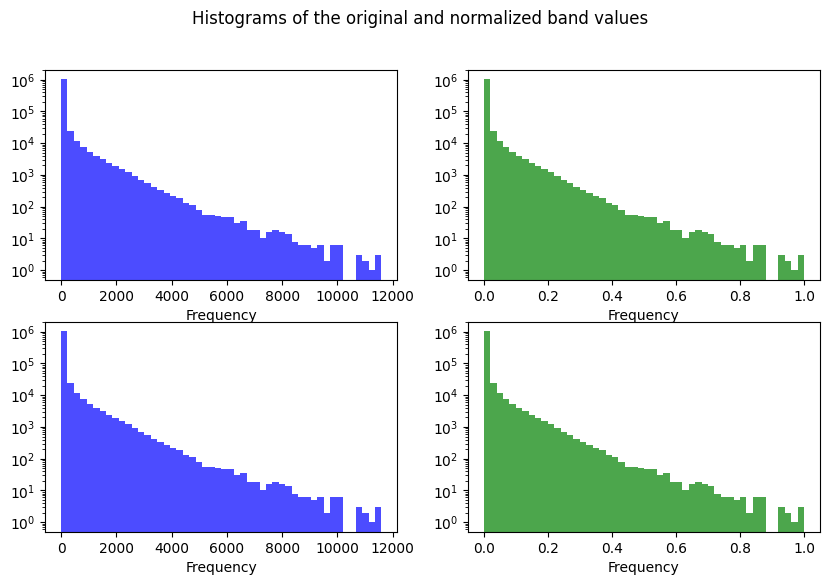

In [5]:
f, ax = plt.subplots(2,2,figsize=(10,6))
f.suptitle('Histograms of the original and normalized band values')

ax[0, 0].hist(band1.flatten(), bins = 50, color = 'blue', alpha = 0.7)
ax[0, 0].set_xlabel('Value')
ax[0, 0].set_xlabel('Frequency')

ax[0, 1].hist(band1_norm.flatten(), bins = 50, color = 'green', alpha = 0.7)
ax[0, 1].set_xlabel('Value')
ax[0, 1].set_xlabel('Frequency')

ax[1, 0].hist(band2.flatten(), bins = 50, color = 'blue', alpha = 0.7)
ax[1, 0].set_xlabel('Value')
ax[1, 0].set_xlabel('Frequency')

ax[1, 1].hist(band2_norm.flatten(), bins = 50, color = 'green', alpha = 0.7)
ax[1, 1].set_xlabel('Value')
ax[1, 1].set_xlabel('Frequency')

[ax[i,j].set_yscale('log') for i in range(2) for j in range(2)]

### Summarising and mulitplying band values


In [6]:
combined_sum = band1_norm + band2_norm

In [7]:
combined_product = band1_norm * band2_norm

In [8]:
combined_sum

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1185, 931))

In [9]:
band1_norm.min(), band1_norm.max()

(np.float64(0.0), np.float64(1.0))

In [10]:
band2_norm.min(), band2_norm.max()

(np.float64(0.0), np.float64(1.0))

In [11]:
combined_sum.min(), combined_sum.max()

(np.float64(0.0), np.float64(2.0))

In [12]:
combined_product.min(), combined_product.max()

(np.float64(0.0), np.float64(1.0))

In [13]:
output_sum_path = 'combined_sum.tif'
output_product_path = 'combined_product.tif'

In [14]:
with rasterio.open(raster_path) as src:

    meta = src.meta.copy()
    meta.update(count=1)

    with rasterio.open(output_sum_path, 'w', **meta) as dst:
        dst.write(combined_sum, 1)

    with rasterio.open(output_product_path, 'w', **meta) as dst:
        dst.write(combined_product, 1)

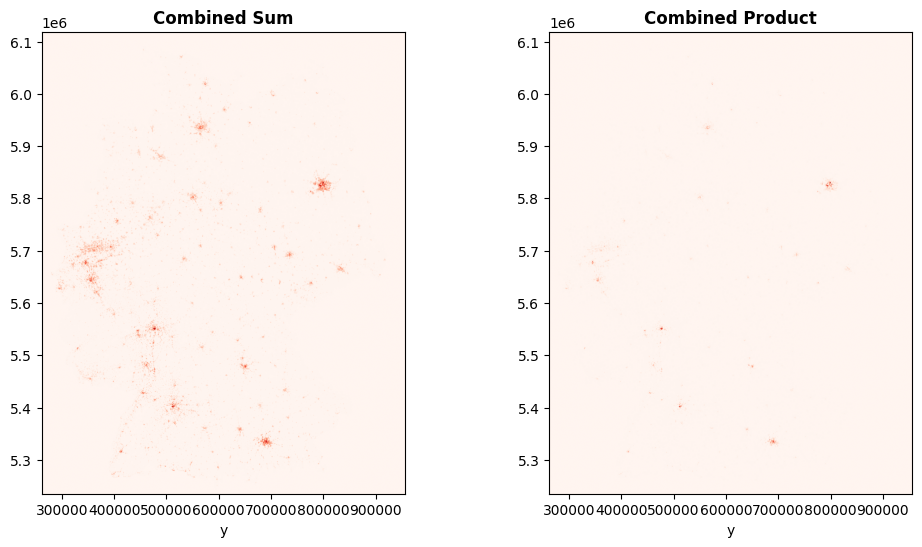

In [15]:
f, ax = plt.subplots(1,2,figsize=(12,6))

with rasterio.open(output_sum_path) as sum_src:
    show(sum_src, ax=ax[0], cmap = 'Reds', title = 'Combined Sum')
    ax[0].set_xlabel('X')
    ax[0].set_xlabel('y')



with rasterio.open(output_product_path) as product_src:
    show(product_src, ax=ax[1], cmap = 'Reds', title = 'Combined Product')
    ax[1].set_xlabel('X')
    ax[1].set_xlabel('y')



### Elevation-Population Index (EPI)

In [20]:
EPI = (band2 - band1) / (band2 + band1)

C:\Users\saral\AppData\Local\Temp\ipykernel_18108\1589764610.py:1: RuntimeWarning: invalid value encountered in divide
  EPI = (band2 - band1) / (band2 + band1)


#### High EPI values close to +1 indicates low elevation areas with high population density
#### Lov EPI scores close to -1 indicates high elevation, low population areas
#### EPI near 0 indicates similar level of Pop density and elevation

In [21]:
raster_path = 'combined_raster.tif'

In [22]:
with rasterio.open(raster_path) as src:
    band1 = src.read(1).astype(float)
    band2 = src.read(2).astype(float)

    epi_index = (band1 - band2) / (band2 + band1 + 1e-6)

    epi_meta = src.meta.copy()
    epi_meta.update(count = 1, dtype = 'float32')

In [ ]:
epi_output_path = 'elevation_population_index.tif'

### Export into a file
with rasterio.open(epi_output_path, 'w', **epi_meta) as dst:
    dst.write(epi_index.astype('float32'), 1)

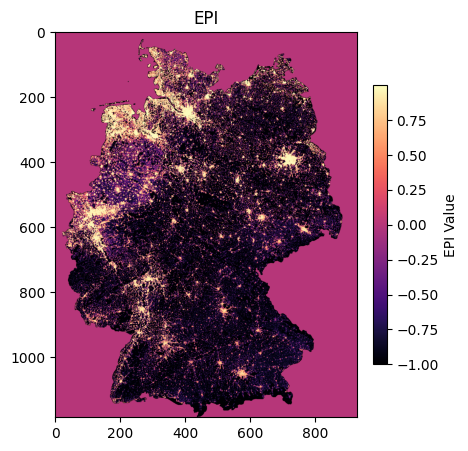

In [24]:
f, ax = plt.subplots(1,1,figsize=(5,5))

with rasterio.open(epi_output_path) as epi_src:
    data = epi_src.read(1)
    img = ax.imshow(data, cmap = 'magma')
    ax.set_title('EPI')

    cbar = plt.colorbar(img, ax=ax, orientation='vertical', fraction=0.036, pad = 0.04)
    cbar.set_label('EPI Value')
    